## Exoplanets preprocessing

In [7]:
# imports and stuff
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [8]:
# read in the data
nasa = pd.read_csv(
    "../data/nasa_2025_02.csv",
    comment='#'
)

display(nasa.head(20))
display(nasa.columns.values)

,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,6,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,2018-04-25,2011-08,2014-07-23,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,7,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,0,1,...,2014-05-14,2008-12,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,8,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,...,2023-09-19,2023-08,2023-09-19,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,9,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,0,1,...,2014-07-23,2011-08,2014-07-23,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,10,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,0,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,4.0,1.0,0.0,0.0,0.0


array(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'default_flag', 'sy_snum', 'sy_pnum',
       'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year',
       'disc_refname', 'disc_pubdate', 'disc_locale', 'disc_facility',
       'disc_telescope', 'disc_instrument', 'rv_flag', 'pul_flag',
       'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag',
       'etv_flag', 'ima_flag', 'dkin_flag', 'soltype', 'pl_controv_flag',
       'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2',
       'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2',
       'pl_masselim', 'pl_massj', 'pl_massjerr1', 'pl_massjerr2',
       'pl_massjlim', 'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2',
       'pl_msinielim', 'pl_msinij', 'pl_msinijer

### Removing controversial planets

In [9]:
print(nasa.shape)
nasa = nasa[nasa['pl_controv_flag'] != 1]
print(nasa.shape)

(38095, 288)
(38020, 288)


## Merging Observations of the same planet into one planet
For now, if there are different values in rows to be merged we will just take their average.\
We could also debate on rather taking the median, doing a majority vote or something similar

In [10]:
print("Amount of distinct planets: ", len(pd.unique(nasa['pl_name'])))

Amount of distinct planets:  5803


### **Exoplanet Data Reliability Analysis**

#### **Observations per Planet Analysis**
The dataset contains multiple observations for some exoplanets, while others have only been observed once. To assess data reliability, we analyze the number of observations per planet before aggregating data.

In [11]:
observations_per_planet = nasa['pl_name'].value_counts()
summary_stats = observations_per_planet.describe()
print("Resumen de observaciones por planeta:")
print(summary_stats)

Resumen de observaciones por planeta:
count    5803.000000
mean        6.551784
std         4.343990
min         1.000000
25%         2.000000
50%         7.000000
75%        10.000000
max        34.000000
Name: count, dtype: float64


**Key Statistics of Observations per Planet:**
- **Total unique planets:** 5803
- **Average observations per planet:** 6.55
- **Minimum observations:** 1
- **Median (50%) observations:** 7
- **Maximum observations:** 34

The median value (7 observations) suggests that half of the exoplanets have been observed at least this many times, while the other half have fewer observations.


In [12]:
thresholds = range(1, 35)
remaining_planets = [sum(observations_per_planet >= t) for t in thresholds]

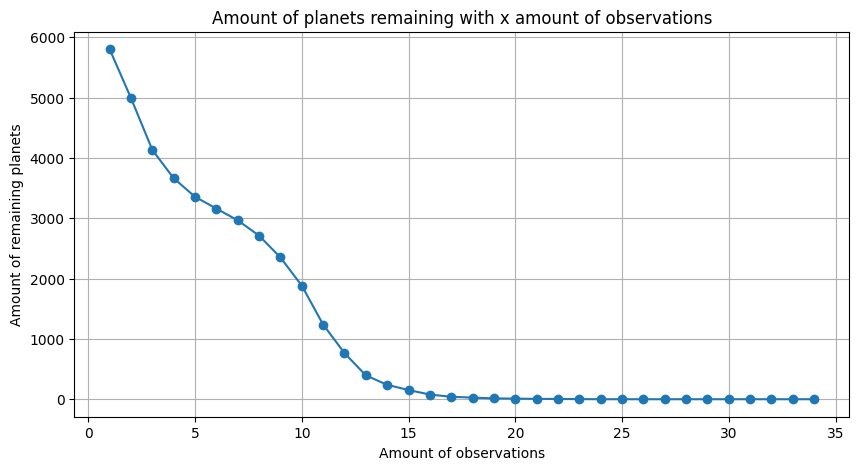

In [13]:
import matplotlib.pyplot as plt
# Plot for the amount of observations per planet
plt.figure(figsize=(10, 5))
plt.plot(thresholds, remaining_planets, marker='o', linestyle='-')
plt.xlabel("Amount of observations")
plt.ylabel("Amount of remaining planets")
plt.title("Amount of planets remaining with x amount of observations")
plt.grid(True)
plt.show()


#### **Threshold Selection for Data Reliability**
To ensure that our analysis includes only well-documented exoplanets, we analyze the impact of setting different minimum observation thresholds. 

**Key Findings:**
- If we require **at least 1 observation**, all 5803 planets are included.
- If we require **at least 2 observations**, the dataset is significantly reduced.
- **A threshold of 7 (the median) retains about half of the planets (~2900).**
- **If the threshold is increased to 10, the number of planets drops to approximately 1500-2000.**


In [14]:
define_threshold = 5
filtered_planets = sum(observations_per_planet >= define_threshold)
print(f"Número de planetas con al menos {define_threshold} observaciones: {filtered_planets}")


Número de planetas con al menos 5 observaciones: 3357


#### **Conclusions & Recommended Threshold**
Based on the findings:
- Planets with only **one observation** should likely be excluded due to insufficient data reliability.
- A threshold of **5-7 observations** provides a good balance between data availability and reliability.
- Increasing the threshold further (e.g., 10 or more) significantly reduces the dataset but ensures higher reliability.

To proceed with a reliable yet comprehensive analysis, we decide filtering planets that have **fewer than 5-7 observations** before inclusion in visualization and habitability assessments.

In [15]:
# Get the names of planets that appear at least 5 times
planets_to_keep = observations_per_planet[observations_per_planet >= define_threshold].index

# Filter the dataset in place
nasa = nasa[nasa['pl_name'].isin(planets_to_keep)]

# Display the new shape of the filtered dataset
print("Filtered dataset size:", nasa.shape)


Filtered dataset size: (32854, 288)


Remove unwanted columns

In [16]:
print(nasa.columns)

# nasa = nasa.filter(like="pl_") # another idea of how it could be done...

relevant_columns = [
    # Planet identification
    'pl_name', 'hostname',

    # Planetary parameters
    'pl_orbper',  # Orbital period (days)
    'pl_orbsmax',  # Semi-major axis (AU)
    'pl_orbeccen',  # Orbital eccentricity
    'pl_rade',  # Planet radius (Earth radii)
    'pl_bmasse',  # Planet mass (Earth masses, best estimate)
    'pl_masse',  # Planet mass (Earth masses)
    'pl_dens',  # Planet density (g/cm³)
    'pl_insol',  # Insolation flux relative to Earth
    'pl_eqt',  # Planet equilibrium temperature (K)
    'pl_orbincl',  # Orbital inclination (degrees)

    # Host star parameters
    'st_teff',  # Star effective temperature (K)
    'st_rad',  # Star radius (Solar radii)
    'st_mass',  # Star mass (Solar masses)
    'st_lum',  # Star luminosity (Solar luminosities)
    'st_met',  # Star metallicity ([Fe/H])
    'st_logg',  # Star surface gravity (cm/s²)

    # Additional useful data
    'sy_dist',  # Distance from Earth (parsecs)
    'discoverymethod',  # Method of discovery
    'disc_year',  # Year of discovery

    # Only for the aggregation
    "pl_pubdate"
]


nasa = nasa[relevant_columns]
print(nasa.columns)

Index(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'default_flag', 'sy_snum',
       ...
       'rowupdate', 'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot',
       'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec'],
      dtype='object', length=288)
Index(['pl_name', 'hostname', 'pl_orbper', 'pl_orbsmax', 'pl_orbeccen',
       'pl_rade', 'pl_bmasse', 'pl_masse', 'pl_dens', 'pl_insol', 'pl_eqt',
       'pl_orbincl', 'st_teff', 'st_rad', 'st_mass', 'st_lum', 'st_met',
       'st_logg', 'sy_dist', 'discoverymethod', 'disc_year', 'pl_pubdate'],
      dtype='object')


## Aggregation
We use the "pl_pupdate" column, which states when a specific observation was updated the last time, to determine the newest values for a planet.
Then we always pick the newest available value for all columns when aggregating all observations into planets

In [17]:
# Here we can simply list how aggregating should be done for each column
nasa = nasa.sort_values(by=["pl_name", "pl_pubdate"], ascending=[True, False])

def aggregate_observations(col):
    col = col.dropna()

    return col.iloc[0] if not col.empty else None


nasa = nasa.groupby('pl_name').agg(aggregate_observations).reset_index().drop(columns=['pl_pubdate'])
display(nasa)

,pl_name,hostname,pl_orbper,pl_orbsmax,pl_orbeccen,pl_rade,pl_bmasse,pl_masse,pl_dens,pl_insol,...,pl_orbincl,st_teff,st_rad,st_mass,st_lum,st_met,st_logg,sy_dist,discoverymethod,disc_year
0,14 Her b,14 Her,1765.038900,2.77400,0.3730,NaN,2559.47216,2559.47216,NaN,NaN,...,144.652,5314.94,1.00,0.91,-0.153,0.405,4.43,17.9323,Radial Velocity,2002
1,16 Cyg B b,16 Cyg B,799.450000,1.67600,0.6832,NaN,556.83537,NaN,NaN,NaN,...,NaN,5711.97,1.16,0.98,0.097,0.074,4.30,21.1397,Radial Velocity,1996
2,47 UMa b,47 UMa,1076.600000,2.05900,0.0160,NaN,774.86566,NaN,NaN,NaN,...,NaN,5829.16,1.14,1.01,0.198,0.026,4.33,13.7967,Radial Velocity,1996
3,51 Peg b,51 Peg,4.230797,0.05235,0.0042,NaN,147.47238,146.20180,NaN,NaN,...,80.000,5760.76,1.19,1.07,0.136,0.206,4.32,15.4614,Radial Velocity,1995
4,55 Cnc b,55 Cnc,14.651710,0.11620,0.0048,NaN,267.29369,254.25000,NaN,NaN,...,90.000,5317.89,0.96,0.97,-0.197,0.383,4.46,12.5855,Radial Velocity,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,pi Men c,HD 39091,6.267829,0.06900,0.0770,2.042,3.49611,3.63000,2.97,309.0,...,87.310,5870.00,1.10,1.02,0.160,0.050,4.36,18.2702,Transit,2018
3353,tau Boo b,tau Boo,3.312453,0.04869,0.0074,NaN,1366.66215,1891.00000,NaN,NaN,...,44.500,6461.32,1.44,1.40,0.505,0.272,4.26,15.6521,Radial Velocity,1996
3354,ups And b,ups And,4.617122,0.05914,0.0069,NaN,214.53417,NaN,NaN,NaN,...,NaN,6156.77,1.62,1.29,0.525,0.122,4.13,13.4054,Radial Velocity,1996
3355,ups And c,ups And,241.223000,0.82650,0.2660,NaN,624.53282,4443.24113,NaN,NaN,...,NaN,6156.77,1.62,1.29,0.525,0.122,4.13,13.4054,Radial Velocity,1999


## Export the processed data

In [18]:
nasa.to_csv('../data/nasa_aggregated.csv')